### 过拟合和欠拟合

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, size=100)

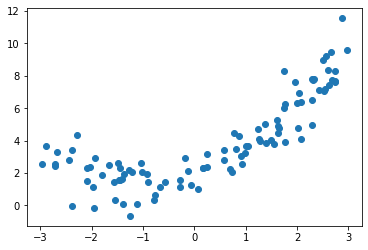

In [3]:
plt.scatter(x, y)
plt.show()

### 使用线性回归来拟合

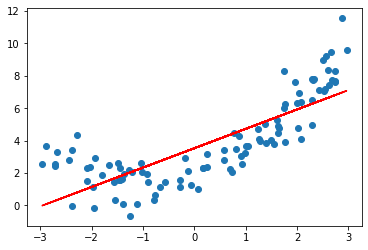

In [4]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

y_predicted = lin_reg.predict(X)

plt.scatter(x, y)
plt.plot(x, y_predicted, color="r")
plt.show()

In [5]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y, y_predicted)

2.520688040270623

### 使用多项式回归

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

def polynomial_regression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

In [7]:
poly_2_reg = polynomial_regression(degree=2)
poly_2_reg.fit(X, y)

Pipeline(steps=[('poly', PolynomialFeatures()),
                ('std_scaler', StandardScaler()),
                ('lin_reg', LinearRegression())])

In [8]:
y_2_predicted = poly_2_reg.predict(X)
mean_squared_error(y, y_2_predicted)

0.9170884990531359

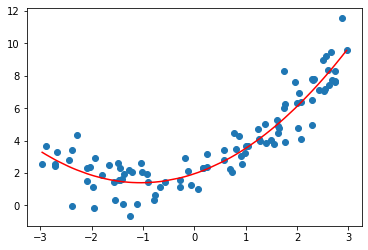

In [9]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_2_predicted[np.argsort(x)], color="r")
plt.show()

0.8997682040637417


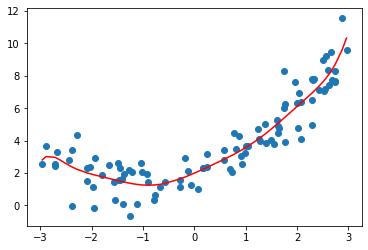

In [10]:
poly_10_reg = polynomial_regression(degree=10)
poly_10_reg.fit(X, y)
y_10_predicted = poly_10_reg.predict(X)
print(mean_squared_error(y, y_10_predicted))
plt.scatter(x, y)
plt.plot(np.sort(x), y_10_predicted[np.argsort(x)], color="r")
plt.show()

0.5226699697706106


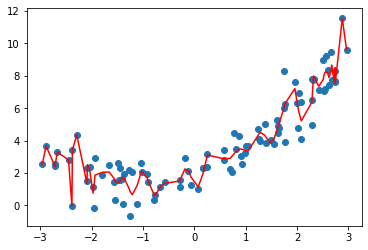

In [11]:
poly_100_reg = polynomial_regression(degree=100)
poly_100_reg.fit(X, y)
y_100_predicted = poly_100_reg.predict(X)
print(mean_squared_error(y, y_100_predicted))
plt.scatter(x, y)
plt.plot(np.sort(x), y_100_predicted[np.argsort(x)], color="r")
plt.show()

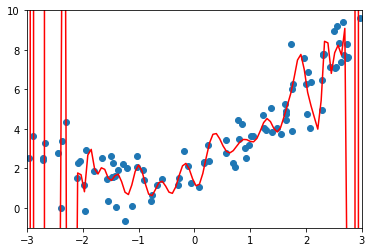

In [12]:
X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
y_plot = poly_100_reg.predict(X_plot)
plt.scatter(x, y)
plt.plot(X_plot[:,0], y_plot, color="r")
plt.axis([-3, 3, -1, 10])
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [14]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_predicted = lin_reg.predict(X_test)
mean_squared_error(y_test, y_predicted)

3.2614489336099735

In [15]:
lin_reg.score(X_test, y_test)

0.5152998988024202

In [16]:
poly_2_reg = polynomial_regression(degree=2)
poly_2_reg.fit(X_train, y_train)
y_2_predicted = poly_2_reg.predict(X_test)
mean_squared_error(y_test, y_2_predicted)

0.7227852628336481

In [17]:
poly_2_reg.score(X_test, y_test)

0.8925832974328324

In [18]:
poly_10_reg = polynomial_regression(degree=10)
poly_10_reg.fit(X_train, y_train)
y_10_predicted = poly_10_reg.predict(X_test)
print(mean_squared_error(y_test, y_10_predicted))
print(poly_10_reg.score(X_test, y_test))

0.8350248035038114
0.8759028226412243
